## Importing Important Libraries

In [71]:
import os
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [72]:
# Set the path to your folder containing .pkl files
folder_path = 'C:/Users/Asus/OneDrive/Desktop/UM_Fraud_Transaction_Detection/fraud_detection/data'

In [74]:
# Load and concatenate all .pkl files
df = pd.concat([
    pd.read_pickle(os.path.join(folder_path, f))
    for f in sorted(os.listdir(folder_path))
    if f.endswith('.pkl')
], ignore_index=True)

In [75]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


## EDA

In [76]:
df.shape

(1754155, 9)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


In [78]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1754155,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2018-07-01 11:20:33.708572160,5.363230e+01,8.369272e-03,1.882388e-02
min,0.000000e+00,2018-04-01 00:00:31,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,2018-05-16 14:40:46.500000,2.101000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2018-07-01 11:11:10,4.464000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,2018-08-16 08:01:01.500000,7.695000e+01,0.000000e+00,0.000000e+00
max,1.754154e+06,2018-09-30 23:59:57,2.628000e+03,1.000000e+00,3.000000e+00
std,5.063811e+05,NaN,4.232649e+01,9.110012e-02,2.113263e-01


In [79]:
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [80]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [81]:
df.dtypes

TRANSACTION_ID                int64
TX_DATETIME          datetime64[ns]
CUSTOMER_ID                  object
TERMINAL_ID                  object
TX_AMOUNT                   float64
TX_TIME_SECONDS              object
TX_TIME_DAYS                 object
TX_FRAUD                      int64
TX_FRAUD_SCENARIO             int64
dtype: object

In [82]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

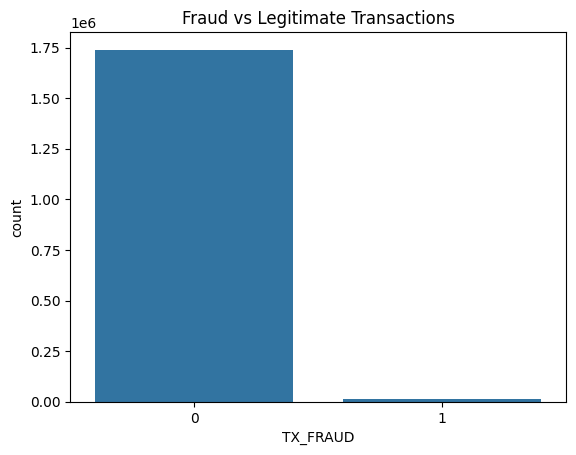

TX_FRAUD
0    0.991631
1    0.008369
Name: proportion, dtype: float64


In [83]:
sns.countplot(x='TX_FRAUD', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()

print(df['TX_FRAUD'].value_counts(normalize=True))


In [85]:
# Percentage of fraud transactions
fraud_percent = df['TX_FRAUD'].mean() * 100
print(f"Fraudulent Transactions: {fraud_percent:.4f}%")

Fraudulent Transactions: 0.8369%


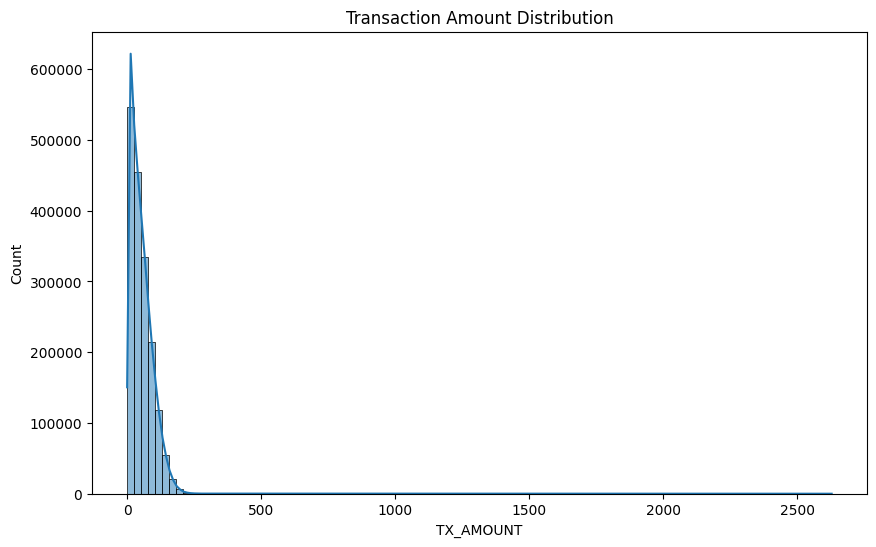

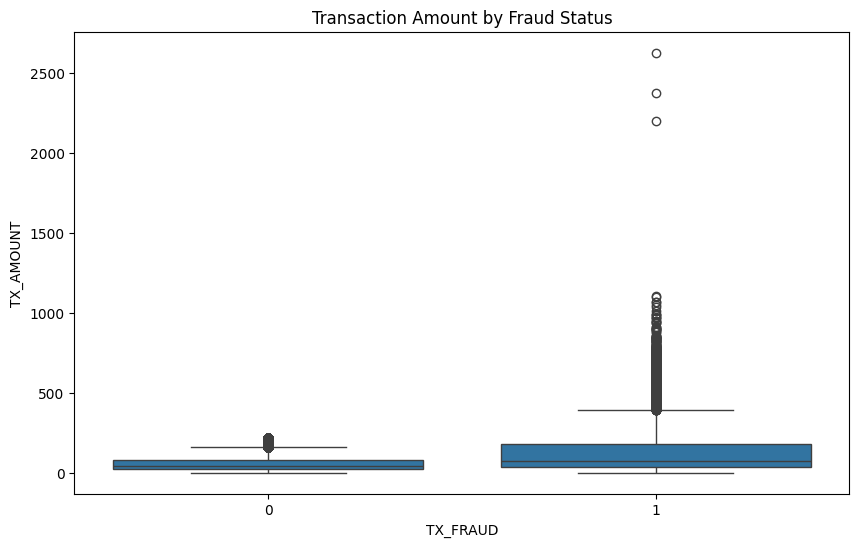

high_amount  TX_FRAUD
False        0           1739474
             1             11423
True         1              3258
dtype: int64


In [86]:
plt.figure(figsize=(10,6))
sns.histplot(df['TX_AMOUNT'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=df)
plt.title("Transaction Amount by Fraud Status")
plt.show()

# How many transactions > 220?
df['high_amount'] = df['TX_AMOUNT'] > 220
print(df.groupby(['high_amount', 'TX_FRAUD']).size())


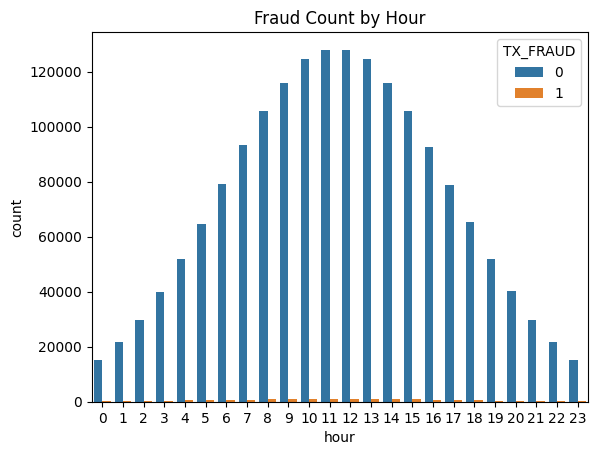

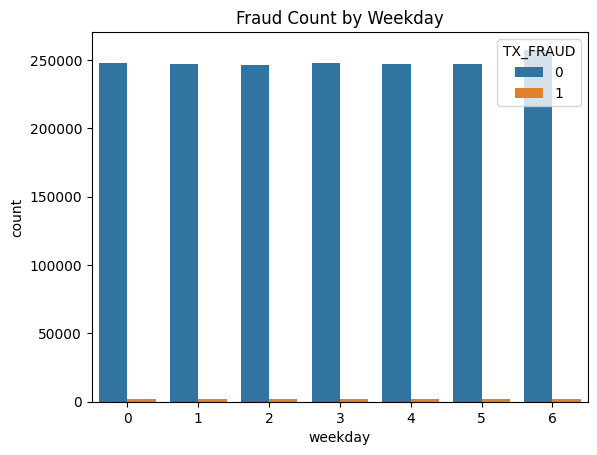

In [89]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['hour'] = df['TX_DATETIME'].dt.hour
df['day'] = df['TX_DATETIME'].dt.day
df['weekday'] = df['TX_DATETIME'].dt.weekday

# Fraud count by hour
sns.countplot(x='hour', hue='TX_FRAUD', data=df)
plt.title("Fraud Count by Hour")
plt.show()

# Fraud count by weekday
sns.countplot(x='weekday', hue='TX_FRAUD', data=df)
plt.title("Fraud Count by Weekday")
plt.show()


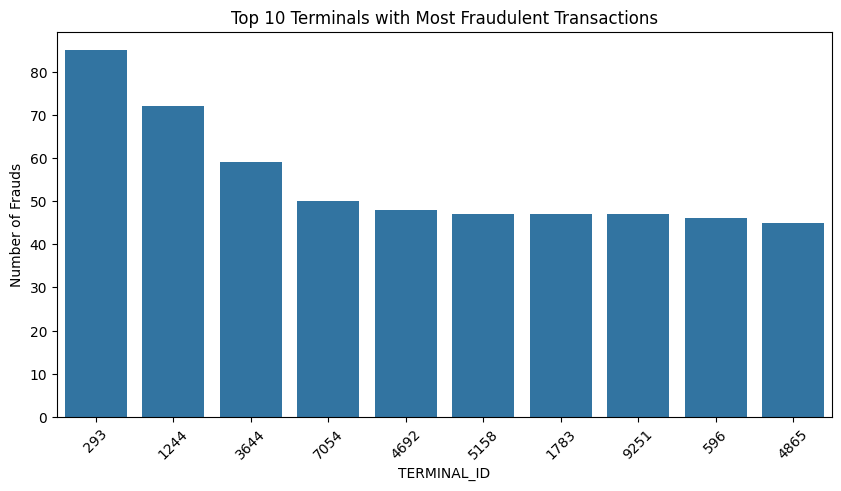

In [90]:
# Top terminals involved in frauds
fraud_terminals = df[df['TX_FRAUD'] == 1]['TERMINAL_ID'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_terminals.index.astype(str), y=fraud_terminals.values)
plt.xticks(rotation=45)
plt.title("Top 10 Terminals with Most Fraudulent Transactions")
plt.xlabel("TERMINAL_ID")
plt.ylabel("Number of Frauds")
plt.show()


In [91]:
fraud_rate = df.groupby('TERMINAL_ID')['TX_FRAUD'].mean()
high_risk_terminals = fraud_rate.sort_values(ascending=False).head(10)
print(high_risk_terminals)


TERMINAL_ID
1244    0.356436
7054    0.322581
293     0.286195
3644    0.271889
596     0.264368
4996    0.244094
2528    0.227941
4876    0.211538
9585    0.210526
7926    0.209790
Name: TX_FRAUD, dtype: float64


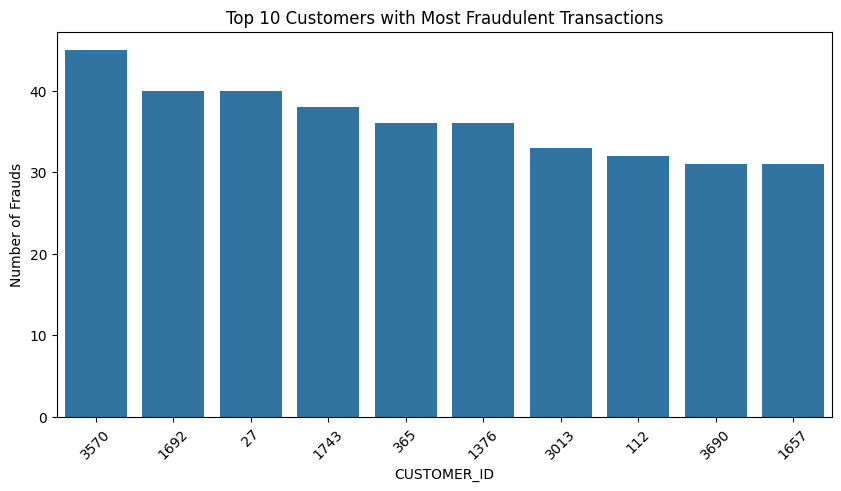

In [92]:
fraud_customers = df[df['TX_FRAUD'] == 1]['CUSTOMER_ID'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_customers.index.astype(str), y=fraud_customers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Customers with Most Fraudulent Transactions")
plt.xlabel("CUSTOMER_ID")
plt.ylabel("Number of Frauds")
plt.show()


In [93]:
df.groupby(['TX_FRAUD'])['TX_AMOUNT'].describe()


,count,mean,std,min,25%,50%,75%,max
TX_FRAUD,,,,,,,,
0,1739474.0,52.977907,39.421733,0.00,20.94,44.49,76.63,219.98
1,14681.0,131.168024,154.485795,0.02,32.98,72.22,177.30,2628.00


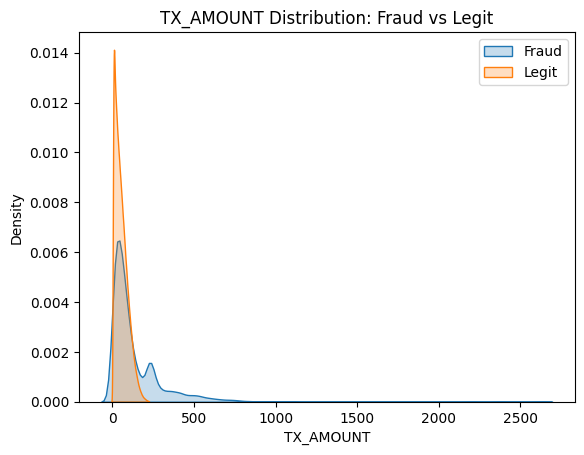

In [94]:
sns.kdeplot(data=df[df['TX_FRAUD'] == 1]['TX_AMOUNT'], label="Fraud", fill=True)
sns.kdeplot(data=df[df['TX_FRAUD'] == 0]['TX_AMOUNT'], label="Legit", fill=True)
plt.title("TX_AMOUNT Distribution: Fraud vs Legit")
plt.legend()
plt.show()


## Feature Engineering

In [95]:
# Binary flag for high amount
df['IS_HIGH_AMOUNT'] = (df['TX_AMOUNT'] > 220).astype(int)


In [96]:
# Ensure datetime format
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Sort for proper rolling
df = df.sort_values(['TERMINAL_ID', 'TX_DATETIME'])

# Initialize empty list to collect rolling values
fraud_rolling_values = []

# Group by terminal and apply rolling fraud count over 28 days
for terminal_id, group in df.groupby('TERMINAL_ID'):
    group = group.copy()
    group.set_index('TX_DATETIME', inplace=True)
    
    # Rolling fraud count over the past 28 days (excluding current)
    group['FRAUD_TERMINAL_COUNT_28D'] = (
        group['TX_FRAUD'].rolling('28D').sum().shift(1).fillna(0)
    )
    
    fraud_rolling_values.append(group.reset_index())

# Concatenate results
df_with_terminal_fraud = pd.concat(fraud_rolling_values).sort_values('TX_DATETIME')

# Replace back to main dataframe
df = df_with_terminal_fraud.sort_values('TRANSACTION_ID').reset_index(drop=True)

In [97]:
df['FRAUD_TERMINAL_FLAG'] = (df['FRAUD_TERMINAL_COUNT_28D'] > 0).astype(int)


In [98]:
# Ensure datetime is in correct format
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Sort by CUSTOMER_ID and TX_DATETIME
df = df.sort_values(['CUSTOMER_ID', 'TX_DATETIME'])

# Store rolling avg amount
customer_rolling = []

# Loop over each customer
for customer_id, group in df.groupby('CUSTOMER_ID'):
    group = group.copy()
    group.set_index('TX_DATETIME', inplace=True)
    
    # Rolling 14-day mean of TX_AMOUNT, excluding current transaction
    group['CUSTOMER_AVG_AMOUNT_14D'] = (
        group['TX_AMOUNT'].rolling('14D').mean().shift(1).fillna(0)
    )
    
    customer_rolling.append(group.reset_index())

# Combine all groups
df_customer_features = pd.concat(customer_rolling).sort_values('TX_DATETIME')

# Merge back into original dataframe
df = df_customer_features.sort_values('TRANSACTION_ID').reset_index(drop=True)


In [99]:
# Avoid division by zero
df['TX_AMOUNT_OVER_AVG'] = df['TX_AMOUNT'] / (df['CUSTOMER_AVG_AMOUNT_14D'] + 1e-6)

# Flag suspicious transactions
df['IS_AMOUNT_ANOMALY'] = (df['TX_AMOUNT_OVER_AVG'] > 5).astype(int)


## Feature Selection

In [100]:
feature_cols = [
    'TX_AMOUNT',                 # base feature
    'IS_HIGH_AMOUNT',           # scenario 1
    'FRAUD_TERMINAL_COUNT_28D', # scenario 2
    'FRAUD_TERMINAL_FLAG',      # scenario 2
    'CUSTOMER_AVG_AMOUNT_14D',  # scenario 3
    'TX_AMOUNT_OVER_AVG',       # scenario 3
    'IS_AMOUNT_ANOMALY',        # scenario 3
    'hour', 'weekday'           # temporal patterns (optional but useful)
]

X = df[feature_cols]
y = df['TX_FRAUD']


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Model Training Using Random Forest Classifier

In [102]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [103]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

## Model Evaluation

In [104]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9958    0.9981    0.9969    521843
           1     0.6883    0.4984    0.5782      4404

    accuracy                         0.9939    526247
   macro avg     0.8420    0.7483    0.7875    526247
weighted avg     0.9932    0.9939    0.9934    526247

ROC-AUC Score: 0.9365787488434215
[[520849    994]
 [  2209   2195]]


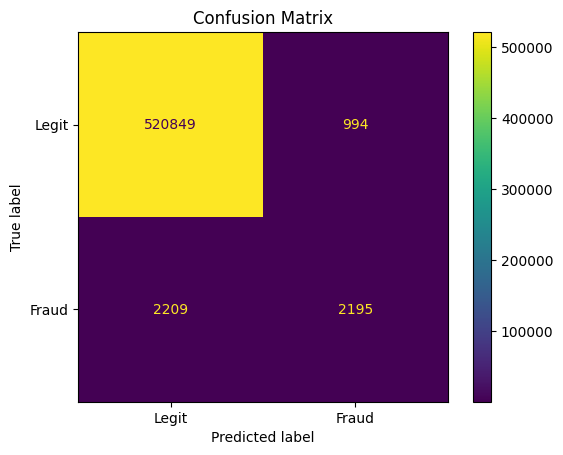

In [105]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=["Legit", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

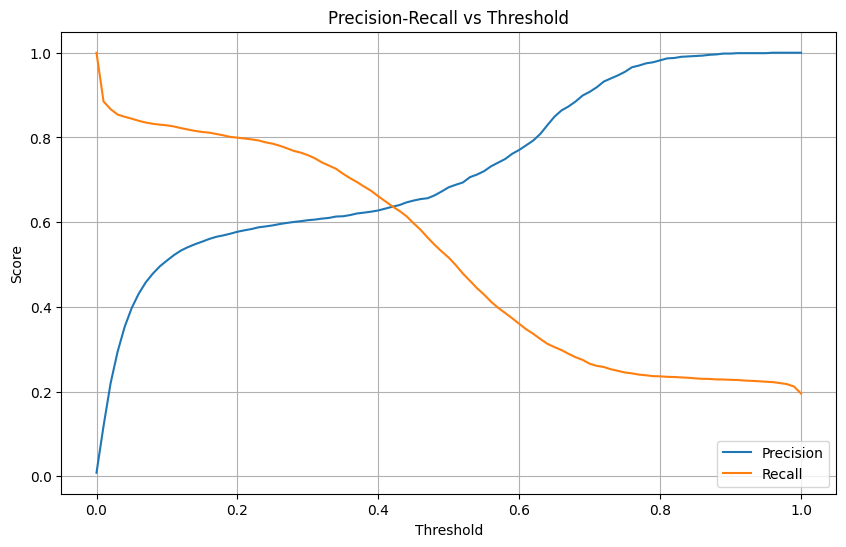

In [106]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title("Precision-Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


## Threshold Tuning

In [108]:
y_pred_new = (y_proba > 0.3).astype(int)  # try 0.3, 0.25, etc.
print(classification_report(y_test, y_pred_new, digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9979    0.9959    0.9969    521843
           1     0.6060    0.7507    0.6707      4404

    accuracy                         0.9938    526247
   macro avg     0.8020    0.8733    0.8338    526247
weighted avg     0.9946    0.9938    0.9942    526247

[[520849    994]
 [  2209   2195]]


In [109]:
joblib.dump(rf, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']